In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error



In [54]:
df = pd.read_csv("/content/drive/MyDrive/CEG/SEM 2/ML/Lab 2/students - students.csv")
df.head(30)

,Rollnumber,Name,English,Maths,Science,Evs,Cse,Total,Attendance
0,2.020000e+09,Anirudh,100,100,100,100,100,100.0,100
1,2.020000e+09,Murali,96,44,88,71,72,74.2,95
2,2.020000e+09,Jivi,57,58,63,63,69,62.0,76
3,2.020000e+09,Srijith,50,82,47,93,97,73.8,90
4,2.020000e+09,Naufel,40,46,41,74,63,52.8,70
5,2.020000e+09,Abdul,97,61,66,77,56,71.4,73
6,2.020000e+09,Meena,40,39,74,89,52,58.8,74
7,2.020000e+09,Saranya,93,73,64,58,61,69.8,75
8,2.020000e+09,Sangeetha,85,55,91,73,89,78.6,80
9,2.020000e+09,Santhiya,75,75,38,82,43,62.6,75


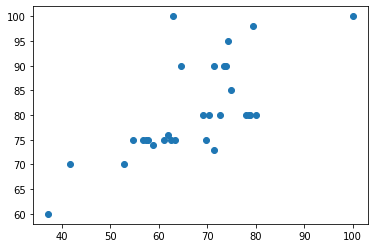

In [24]:
plt.scatter(df['Total'],df['Attendance'])

In [25]:
to_drop=['English', 'Maths', 'Evs', 'Cse', 'Science', 'Rollnumber']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Name,Total,Attendance
0,Anirudh,100.0,100
1,Murali,74.2,95
2,Jivi,62.0,76
3,Srijith,73.8,90
4,Naufel,52.8,70


Total         1.000000
Attendance    0.696184
Name: Total, dtype: float64


<AxesSubplot:>

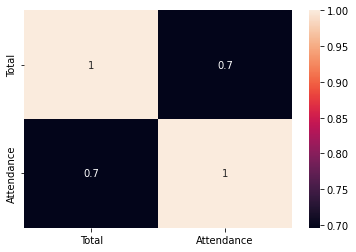

In [26]:
correlation = df.corr()
print(correlation["Total"].sort_values(ascending=False))

sns.heatmap(data=correlation, annot=True)


In [37]:
X = df['Attendance'].values.reshape(-1,1)
y = df['Total']


X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

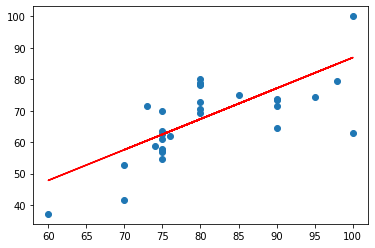

In [35]:

best_fitline = model.coef_*X+model.intercept_

plt.scatter(X, y)
plt.plot(X, best_fitline, color = 'r');
plt.show()

In [38]:
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
2,62.0,63.447880
28,63.0,86.848047
13,37.2,47.847769
10,78.0,67.347908
26,69.2,67.347908
24,54.6,62.472873


In [42]:
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 9.386792219439032
RMSE: 11.993610319595712
R-Square: 0.10836373144934086


In [49]:
lin_reg.score(X_test,y_test)*100


10.836373144934086

In [55]:
hours = np.array([int(input("Enter the Attendance % : "))]) 
hours = hours.reshape(-1,1)
own_pred = model.predict(hours)
print("if the Attendance %  = {}".format(float(hours)))
print("then the Predicted Score = {}".format(round(own_pred[0],2)))

Enter the Attendance % : 86
if the Attendance %  = 86.0
then the Predicted Score = 73.2
